## 5. Plots

###  Sample Solutions 

Execute the first cell to get some data that you can plot.

In [1]:
using CairoMakie, Distributions

In [2]:
function Julia_parser(path::String)
    eval(Meta.parse(readline(path)))
end

averagetemp_Station3 = Julia_parser("Temperatur_Station3.json")
averagetemp_Station44 = Julia_parser("Temperatur_Station44.json")
averagetemp_Station73 = Julia_parser("Temperatur_Station73.json")
rainfall_Station3 = Julia_parser("Niederschlag_Station3.json")
rainfall_Station44 = Julia_parser("Niederschlag_Station44.json")
rainfall_Station73 = Julia_parser("Niederschlag_Station73.json")



Histolist = rand(Normal(100,15),100000)
loglist=[exp(-i*0.1) for i in range(1,81)]
Months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"];

### <p style='color: green'>easy</p>

#### Exercise 1 
Plot average temperatures per month at the three different stations against the months (`Months`) in three different figures as lines plots together with a legend.
#### Solution 1 

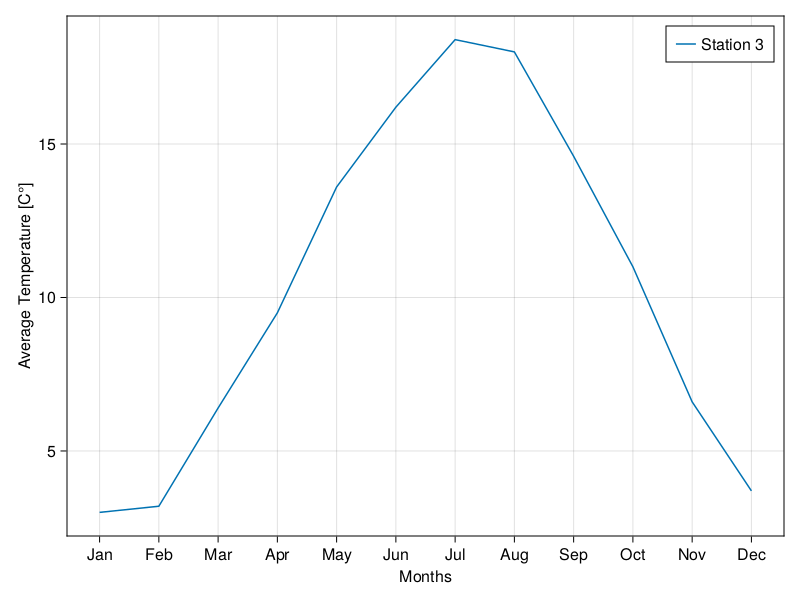

In [3]:
fig_1 = Figure()
months = [x for x in 1:length(Months)]
ax_1 = Axis(fig_1[1,1], xticks = (months,Months), xlabel = "Months", ylabel = "Average Temperature [C°]")
line_1 = lines!(ax_1,averagetemp_Station3, label = "Station 3")
axislegend(ax_1)
fig_1

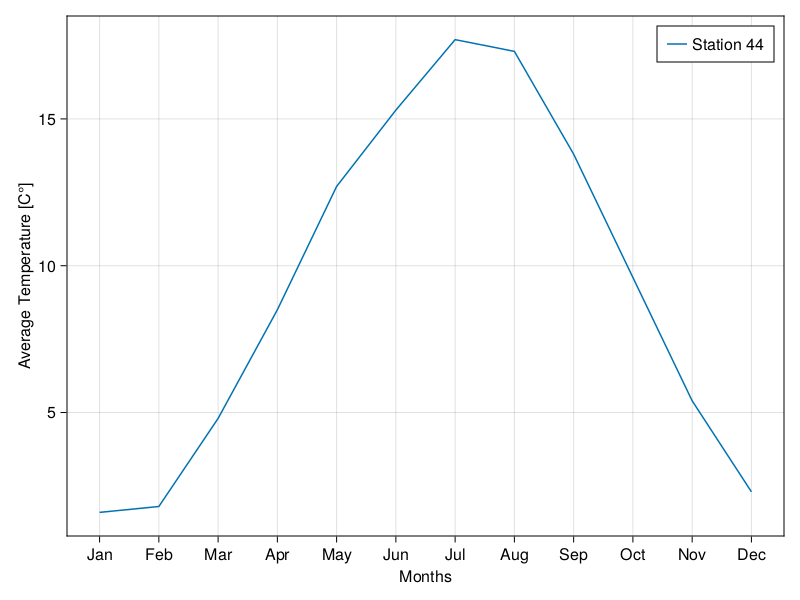

In [4]:
fig_2 = Figure()
ax_2 = Axis(fig_2[1,1], xticks = (months,Months), xlabel = "Months", ylabel = "Average Temperature [C°]")
line_2 = lines!(ax_2,averagetemp_Station44, label = "Station 44")
axislegend(ax_2)
fig_2

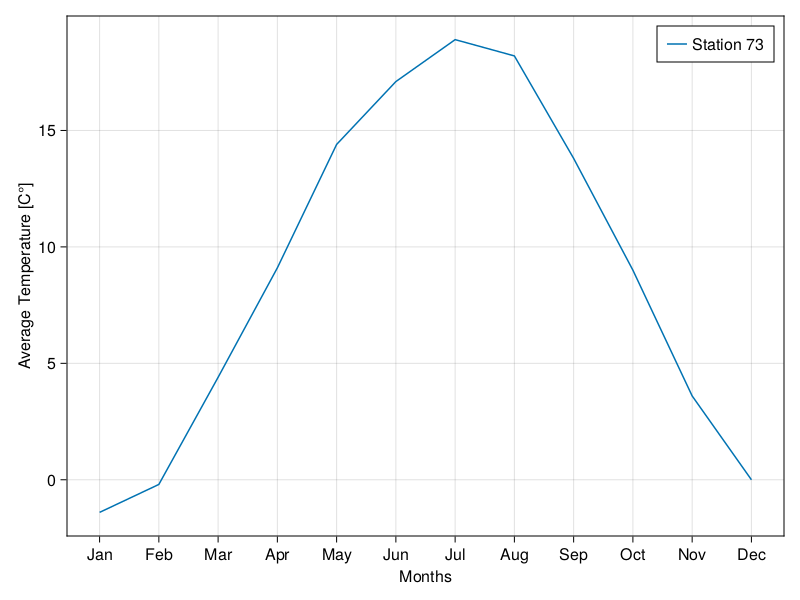

In [5]:
fig_3 = Figure()
ax_3 = Axis(fig_3[1,1], xticks = (months,Months), xlabel = "Months", ylabel = "Average Temperature [C°]")
line_3 = lines!(ax_3,averagetemp_Station73, label = "Station 73")
axislegend(ax_3)
fig_3

#### Exercise 2
Plot average temperatures per month at the three different stations against the months in three different scatter plots with different colors into the same figure but three different axes. 
#### Solution 2 

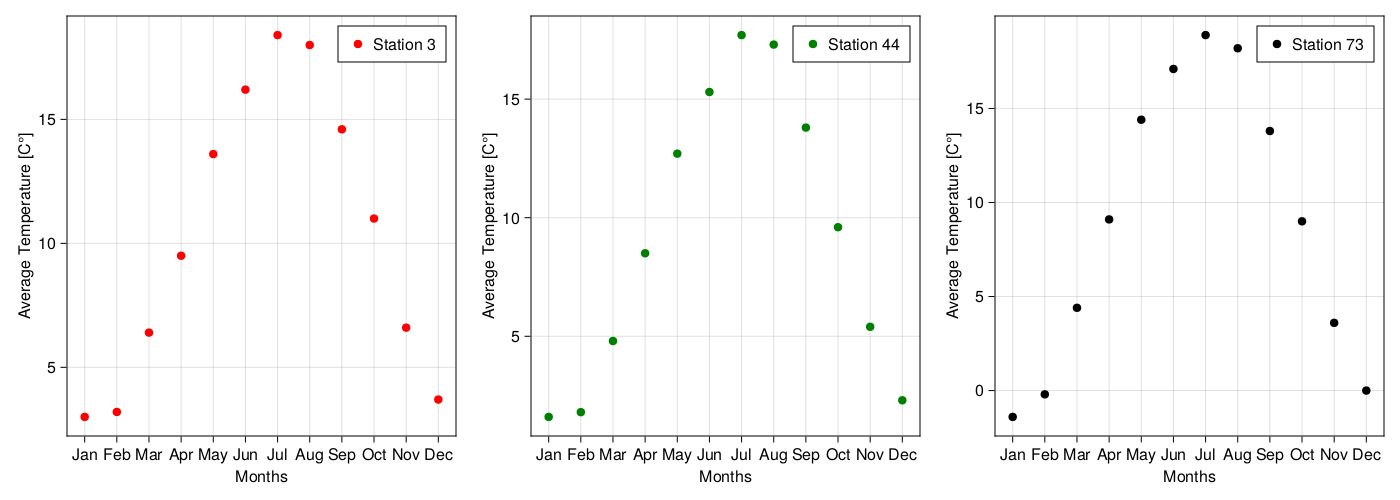

In [6]:
fig_4 = Figure(resolution = (1400,500))

ax_4_1 = Axis(fig_4[1,1], xticks = (months,Months), xlabel = "Months", ylabel = "Average Temperature [C°]")
line_4 = scatter!(ax_4_1,averagetemp_Station3, label = "Station 3", color = "red")
axislegend(ax_4_1)

ax_4_2 = Axis(fig_4[1,2], xticks = (months,Months), xlabel = "Months", ylabel = "Average Temperature [C°]")
line_4_2 = scatter!(ax_4_2,averagetemp_Station44, label = "Station 44",color = "green")
axislegend(ax_4_2)

ax_4_3 = Axis(fig_4[1,3], xticks = (months,Months), xlabel = "Months", ylabel = "Average Temperature [C°]")
line_4_3 = scatter!(ax_4_3,averagetemp_Station73, label = "Station 73", color = "black")
axislegend(ax_4_3)

fig_4

#### Exercise 3
Make a bar plot of the rainfall per month at station 3.
#### Solution 3 

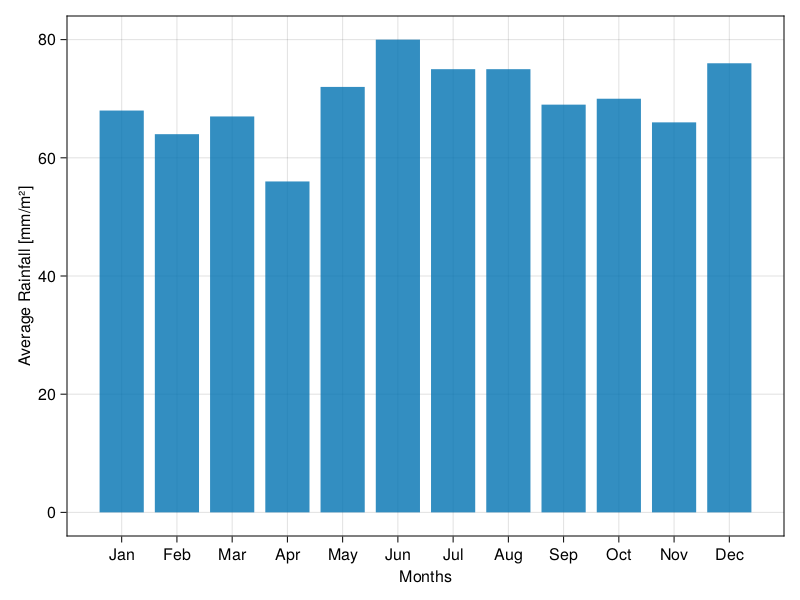

In [7]:
fig_5 = Figure()
ax_5 = Axis(fig_5[1,1], xticks = (months, Months), xlabel = "Months", ylabel = "Average Rainfall [mm/m²]")
barplot!(ax_5, rainfall_Station3)
fig_5

#### Exercise 4
Make a boxplot of the temperatures at each station.
#### Solution 4 

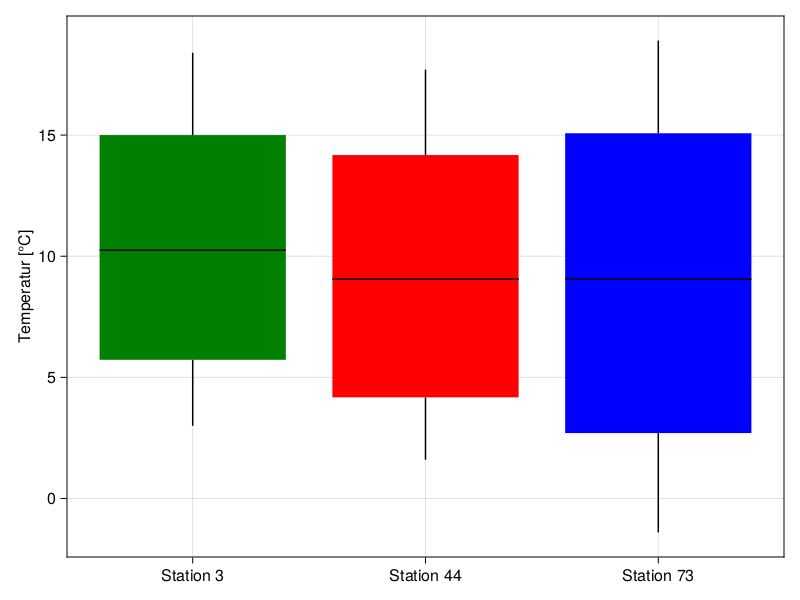

In [8]:
fig_6 = Figure()
stations = ["Station 3", "Station 44","Station 73"]
pos_array = [1 for x in 1:length(averagetemp_Station3)]
ax_6 = Axis(fig_6[1,1], xticks = (1:3,stations), ylabel = "Temperatur [°C]")

boxplot!(ax_6,pos_array, averagetemp_Station3, color = "green")
boxplot!(ax_6,pos_array.+1, averagetemp_Station44, color = "red")
boxplot!(ax_6,pos_array.+2, averagetemp_Station73, color = "blue")
fig_6


### <p style='color: orange'>medium</p>

#### Exercise 5
Make a histogramm of `Histolist`, which contains generated data of an IQ distribution, with `100` bins. Add a black vertical line at `100`
#### Solution 5

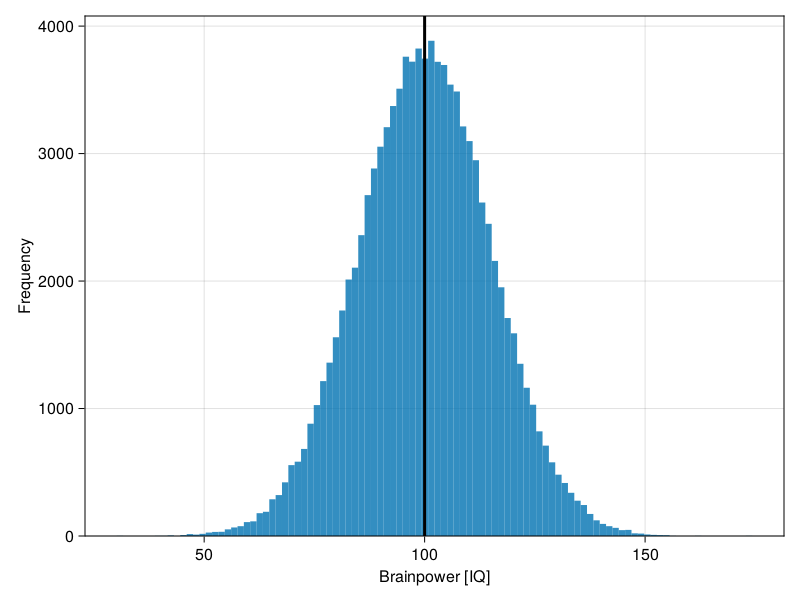

In [22]:
fig_7 = Figure()
ax_7 = Axis(fig_7[1,1], xlabel = "Brainpower [IQ]", ylabel = "Frequency")
ylims!(low = 0)
hist!(ax_7,Histolist, bins = 100)
vlines!(ax_7, 100, color = "black", linewidth =  3)
fig_7

#### Exercise 6
Use the Makie documentation to study the additional keyword arguments for `hist()`. Use this to make  a histogram using the same data as in 5. but plot the probabilty density instead of the frequency of the IQ , `20` bins, a nice looking stroke and change one additonal feature of your choice.
#### Solution 6

In [10]:
import ColorSchemes as co

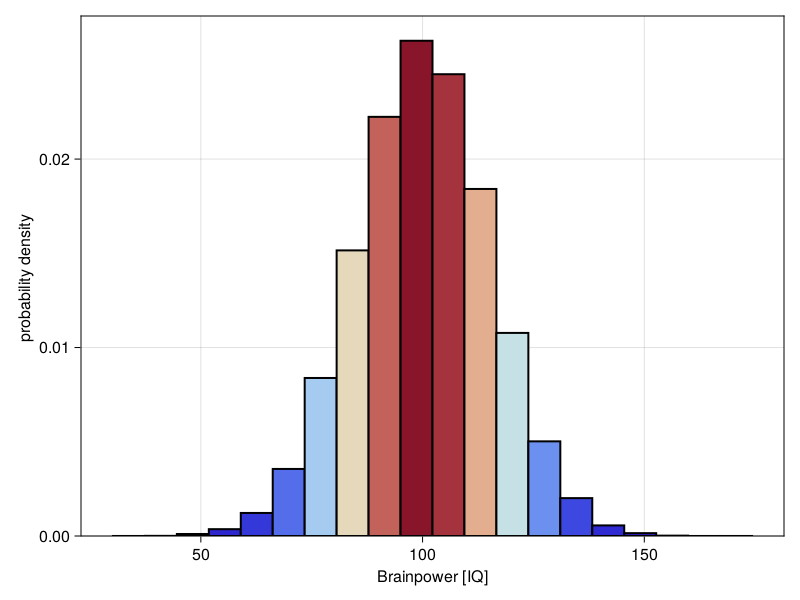

In [21]:
fig_8 = Figure()
ax_8 = Axis(fig_8[1,1], xlabel = "Brainpower [IQ]",  ylabel = "probability density ")
ylims!(low = 0)
hist!(ax_8,Histolist, bins = 20, normalization = :pdf, strokecolor = "black", 
    strokewidth = 2, color = :values, 
    colormap = co.thermometer,
    label_size = 11  )
fig_8

#### Exercise 7
 Look at the offical documentation of [themes](https://docs.makie.org/stable/documentation/theming/) in Makie. Choose one of the [predefined themes](https://docs.makie.org/stable/documentation/theming/predefined_themes/) and activate it with the function `set_theme!()`. Recreate some of the plots in the previous exercises. 

Use the function `update_theme!()` to change one or more settings of the theme to customize it for your needs. 
#### Solution 7

In [24]:
set_theme!(theme_black())

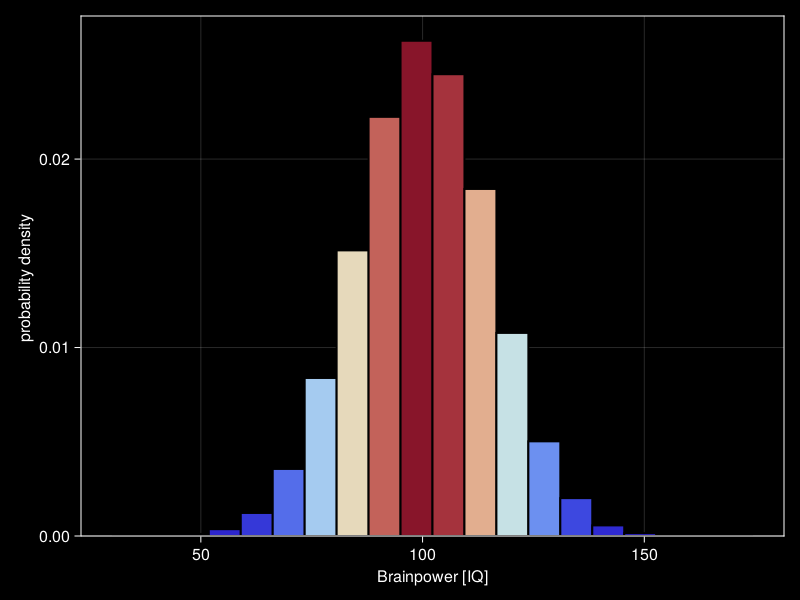

In [25]:
fig_8 = Figure()
ax_8 = Axis(fig_8[1,1], xlabel = "Brainpower [IQ]",  ylabel = "probability density ")
ylims!(low = 0)
hist!(ax_8,Histolist, bins = 20, normalization = :pdf, strokecolor = "black", 
    strokewidth = 2, color = :values, 
    colormap = co.thermometer,
    label_size = 11  )
fig_8

In [26]:
### needed for the background color change
using Pkg
Pkg.add("Colors")
using Colors

    Updating registry at `C:\Users\ank10ki\.julia\registries\General.toml`


   Resolving package versions...


  No Changes to `C:\Users\ank10ki\Dropbox\phd\Courses\WS2022_Julia\Project.toml`
  No Changes to `C:\Users\ank10ki\Dropbox\phd\Courses\WS2022_Julia\Manifest.toml`

In [27]:
update_theme!(backgroundcolor = RGB(0.0,0.3,0.25), fonts =(;regular  = "Blackchancery"), fontsize = 28)

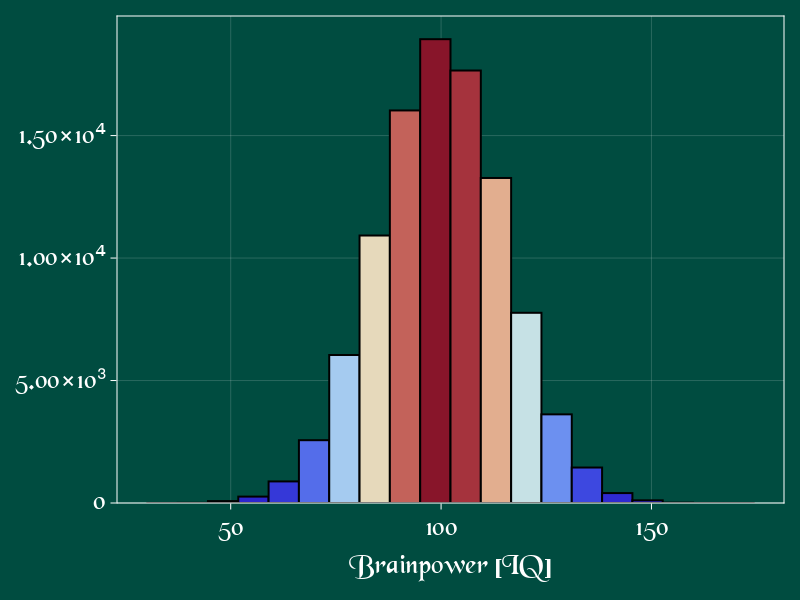

In [28]:
fig_8 = Figure()
ax_8 = Axis(fig_8[1,1], xlabel = "Brainpower [IQ]")
ylims!(low = 0)
hist!(ax_8,Histolist, bins = 20, pdf = true, strokecolor = "black", 
    strokewidth = 2, color = :values, 
    colormap = co.thermometer,
    label_size = 11  )
fig_8

#### Exercise 8
Make a plot of `loglist`, which could resemble the decline of something over time (just come up with something for your labels), without and with a logarithmic y-axis (use the documentation).
#### Solution 8

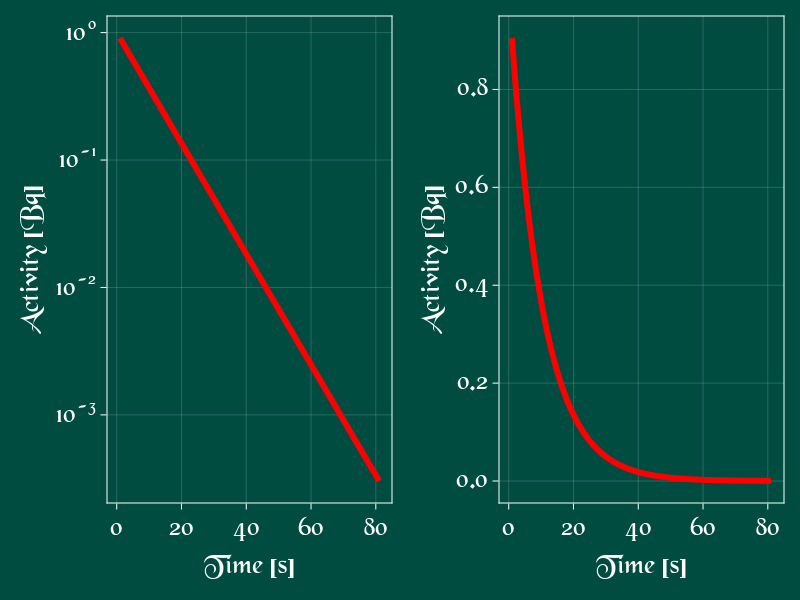

In [29]:
fig_9 = Figure()
ax_9_1 = Axis(fig_9[1,1], yscale = log10, ylabel = "Activity [Bq]",xlabel = "Time [s]")
lines!(ax_9_1, loglist, linewidth = 6, color = "red")
ax_9_2 =  Axis(fig_9[1,2], ylabel = "Activity [Bq]", xlabel = "Time [s]")
lines!(ax_9_2, loglist, linewidth = 6, color = "red")
fig_9

### <p style='color: red'>hard</p>

#### Exercise 9
Make a diagram in wich `averagetemp_Station73` is plotted as a line graph and `rainfall_Station73` is plotted as a bar graph. Try to get the axis for rainfall on the right and for temperature on the left side of the diagram. Check the [documentation](https://docs.makie.org/stable/examples/blocks/axis/#creating_a_twin_axis) of twin axis to find out how.     

#### Solution 9

In [30]:
months

12-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12

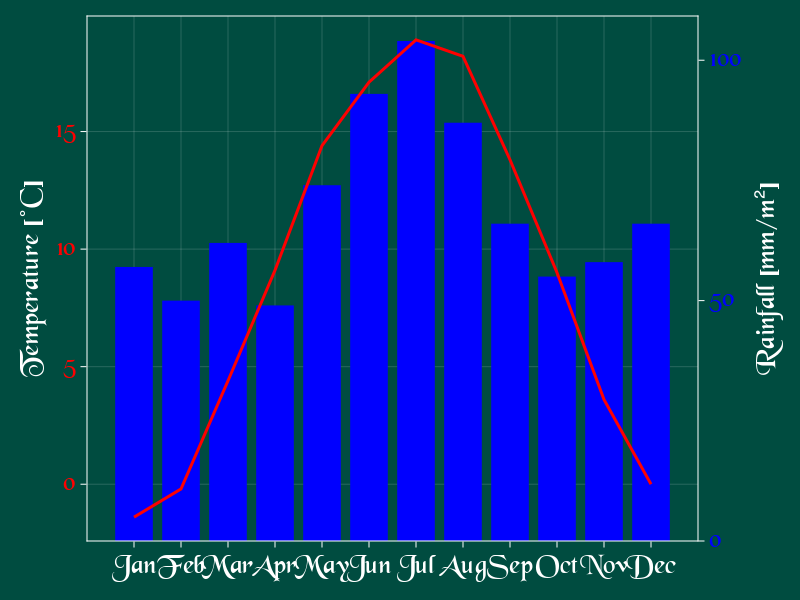

In [31]:
fig_10 = Figure()
ax10_right = Axis(fig_10[1, 1], yticklabelcolor = :blue, yaxisposition = :right, ylabel = "Rainfall [mm/m²]",xgridvisible = false,
        ygridvisible = false)
ax10_left = Axis(fig_10[1, 1], yticklabelcolor = :red,xticks = (months, Months), ylabel = "Temperature [°C]")

hidespines!(ax10_right)
hidexdecorations!(ax10_right,minorgrid = false)


barplot!(ax10_right,months,rainfall_Station73, color = :blue)
lines!(ax10_left,months,averagetemp_Station73, color = :red, linewidth = 3)

ylims!(ax10_right, low = 0)
#ylims!(ax10_left, low = 0)

xlims!(ax10_right, 0,13)
xlims!(ax10_left, 0,13)
fig_10

#### Exercise 10
 Make a plot with the rainfall of all three stations in one bar graph where the three different bars are shown for every month and without grid. Check the [documentation](https://docs.makie.org/stable/examples/plotting_functions/barplot/) of barplot to find out how.   

#### Solution 10

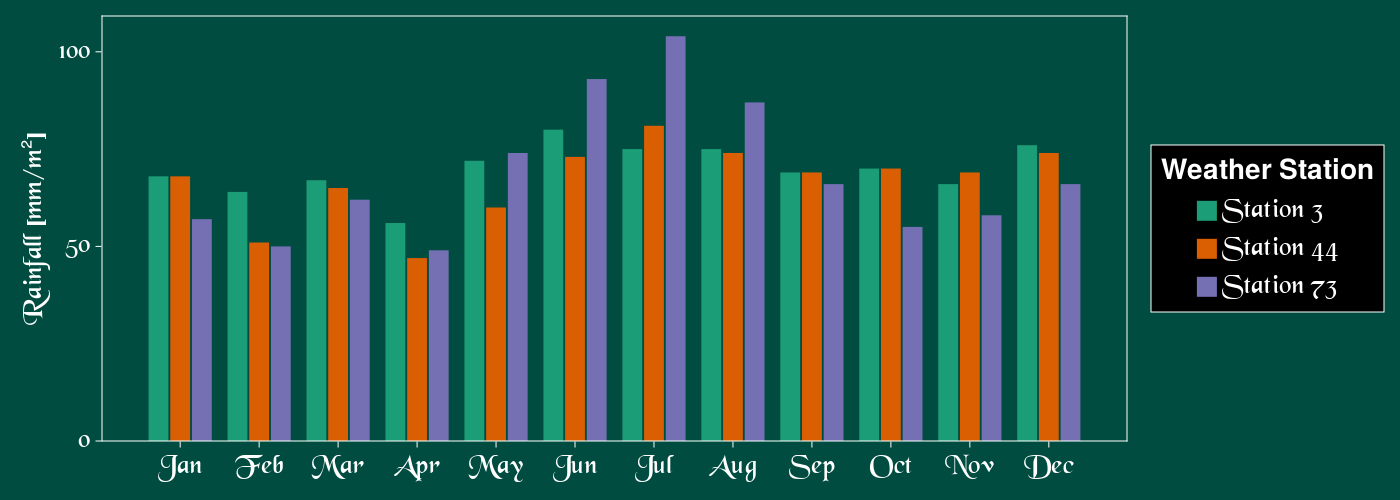

In [32]:
import ColorSchemes as co
cum_months = repeat(months,3)
all_stations = append!(Float64[],rainfall_Station3,rainfall_Station44,rainfall_Station73)


fig_11 = Figure(resolution =(1400,500))
ax11 = Axis(fig_11[1,1],xgridvisible = false,
        ygridvisible = false,xticks = (months, Months),ylabel = "Rainfall [mm/m²]")
barplot!(cum_months,all_stations, dodge = [x for x in 1:3 for y in 1:12],
    color = [x for x in 1:3 for y in 1:12], colormap = co.:Dark2_3)
ylims!(low = 0)

labels = ["Station 3", "Station 44", "Station 73"]
elements = [PolyElement(color =co.:Dark2_3[i]) for i in 1:length(labels)]
title = "Weather Station"

Legend(fig_11[1,2],elements, labels, title)

fig_11